<a href="https://colab.research.google.com/github/OwenHimmel/DS2002F24/blob/main/ACCBasketball.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/acc_players-2324F.csv')

#Read in first 5 rows
df.head()


,Rk,Player,Class,Pos,School,G,MP,TRB,AST,STL,...,TOV,PF,PTS,FG%,2P%,3P%,FT%,PER,WS,BPM
0,1,Amaree Abram,SO,G,Georgia Tech,10,108,17,11,1,...,9,10,34,0.262,0.318,0.200,0.615,4.1,-0.1,-6.4
1,2,Sola Adebisi,FR,F,Florida State,7,9,1,1,0,...,1,1,2,0.500,0.500,NaN,NaN,3.5,0.0,-6.7
2,3,Prince Aligbe,SO,F,Boston College,35,651,119,21,15,...,30,51,164,0.435,0.522,0.147,0.620,9.4,0.9,-1.3
3,4,Abe Atiyeh,SR,G,Boston College,4,6,0,0,0,...,1,0,3,0.333,0.000,1.000,NaN,1.1,0.0,-8.2
4,5,Zack Austin,JR,F,Pittsburgh,33,746,137,29,32,...,13,35,216,0.417,0.563,0.295,0.737,18.0,2.9,7.9


In [21]:
# Basic Analysis

#Total Points
points = df['PTS'].sum()
print(points)

38411


In [37]:
#Most Minutes

player_minutes = df.sort_values(by='MP', ascending=False)
max_player = player_minutes['Player'].head(1)
minutes = str(player_minutes['MP'].head(1))
# print(max_player)
# print(minutes)

In [ ]:
#Top 5 total rebounders

rebounders = df.sort_values(by='TRB', ascending=False)
top_5_rebounders = rebounders['Player'].head(5)

print(top_5_rebounders)

In [ ]:
#Player filtering

#Only players who played more than 500 minutes

moreminutes_df = df[df['MP'] > 500]



In [ ]:
#Highest total assists

assists = moreminutes_df.sort_values(by='AST', ascending=False)
highest_assists = assists['Player'].head(1)

print(highest_assists)

In [ ]:
#Top 3 acc assisters
top_3_assists = assists['Player'].head(3)
print(top_3_assists)

In [ ]:
#Top 3 acc blockers

blocks = moreminutes_df.sort_values(by='BLK', ascending=False)
top_3_blockers = blocks['Player'].head(3)
print(top_3_blockers)

In [ ]:
# School Based Analysis

#Total Points Scored
team_points = df.groupby('School')[['PTS']].sum().reset_index()
print(team_points)


In [ ]:
#Total Assists

team_assists = df.groupby('School')[['AST']].sum().reset_index()
print(team_assists)

In [ ]:
#Top 3 team scoring totals

top_3_scoring = team_points.sort_values(by='PTS', ascending=False)
top_3_scoring = top_3_scoring['School'].head(3)
print(top_3_scoring)

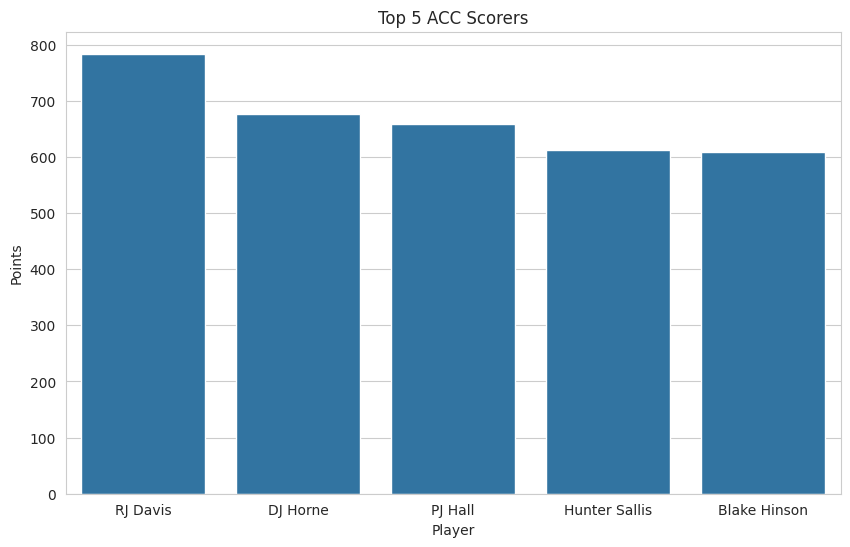

In [66]:
# Top 5 ACC Scorers, Bar Graph

import seaborn as sns

sns.set_style('whitegrid')

top_5_scorers = df.sort_values(by='PTS', ascending=False).head(5)


plt.figure(figsize=(10,6))
sns.barplot(x='Player', y='PTS', data=top_5_scorers)
plt.xlabel('Player')
plt.ylabel('Points')
plt.title('Top 5 ACC Scorers')
plt.show()



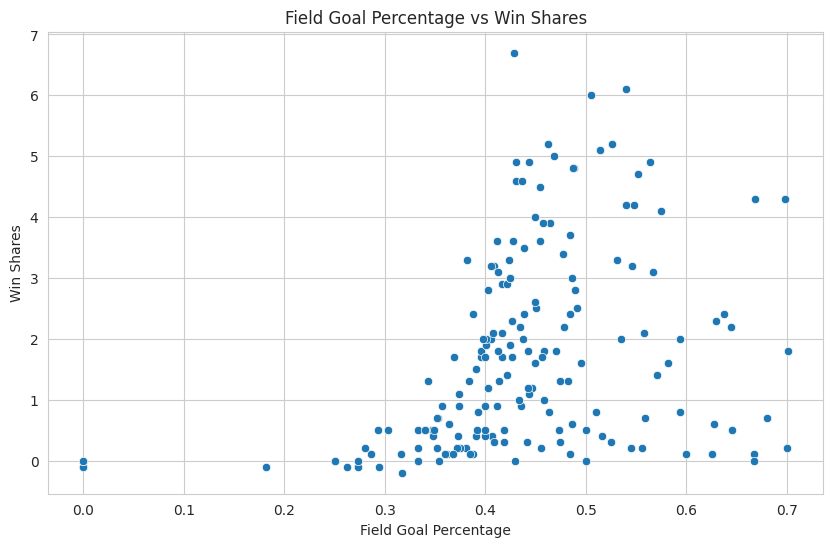


Correalation Coefficent: 0.421


In [72]:
#Corealation between FG% and Win Shares


plt.figure(figsize=(10,6))
sns.scatterplot(x='FG%', y='WS', data=df)
plt.xlabel('Field Goal Percentage')
plt.ylabel('Win Shares')
plt.title('Field Goal Percentage vs Win Shares')
plt.show()

#Calculate correalation Coefficent

correlation = str(df['FG%'].corr(df['WS']).round(3))
print('')
print("Correalation Coefficent: "+correlation)